# Dreamclinic Client Churn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
import datetime as dt

In [ ]:
pep8 = "0987654321" * 8

In [ ]:
pep8

In [ ]:
client_df = pd.read_excel("~/dales_work/clinic_services_8-1-2016_to_8-3-2019.xlsx")


In [ ]:
client_df.drop('Name_Full', axis=1, inplace=True)

# remove rows where HrsWorked = 0 because they are just used by the front desk staff
client_df  = client_df[client_df['HrsWorked'] != 0]

# fill NaN values in 'Service_Category with 'Massage'
client_df['Service_Category'].fillna(value='Massage', inplace=True)

# remove white space from Therapist names
client_df['Therapist'] = client_df['Therapist'].str.strip()

# make all therapist names lowercase to avoid typos in data entry
client_df['Therapist'] = client_df['Therapist'].str.lower()

# make all therapist names lowercase to avoid typos in data entry
client_df['Therapist'] = client_df['Therapist'].str.lower()

# find and replace nicknames with domain knowledge
client_df = client_df.replace('abby thomson', 'abigail thomson')

#Drop Address_City and Addres_State Columns from Dataframe
client_df.drop(['Address_City', 'Address_State'], axis=1, inplace=True)

In [ ]:
# Drop rows without a clientID
client_df.dropna(subset=['clientID'], inplace=True)

In [ ]:
# Adds year and month columns to dataframe
client_df['Year'] = client_df['TransactionDate'].map(lambda x: x.year)

client_df['Month'] = client_df['TransactionDate'].map(lambda x: x.month)

In [ ]:
# creates a Dataframe that groups by year and month and counts unique clients
counts_by_month_df = client_df.groupby(['Year', 'Month']).nunique()

In [ ]:
# Cleans the counts_by_month_df to only include data that is applicaple to it's EDA
counts_by_month_df.rename(columns={"clientID" : "unique_client_count", 
                                   "Therapist" : "therapists_employed", 
                                   "Zipcode" :"zipcodes_reached"}, inplace=True)

In [ ]:
#Drop unnessesary columns
counts_by_month_df.drop(["TransactionDate", "Invoice_Category", "HrsWorked", "Year", "Month"], axis=1, inplace=True)

In [ ]:
counts_by_month_df.head()

In [ ]:
months = client_df.TransactionDate.dt.to_period("M")

In [ ]:
g = client_df.groupby(per)

In [ ]:
client_count_df = g.nunique()  #

In [ ]:
client_count_df.drop('TransactionDate', axis=1, inplace= True)

In [ ]:
client_count_df.reset_index(inplace=True)

In [ ]:
client_count_df["client_count"] = client_count_df['clientID']

In [ ]:
client_count_df.drop('clientID', axis=1, inplace=True)

In [ ]:
client_count_df['TransactionDate'] = client_count_df['TransactionDate'].astype('str')

In [ ]:
client_count_df.rename(columns={"clientID" : "unique_client_count", 
                                   "Therapist" : "therapists_employed", 
                                   "Zipcode" :"zipcodes_reached"}, inplace=True)


In [ ]:
client_count_df.drop(["Invoice_Category", "HrsWorked", "Year", "Month"], axis=1, inplace=True)
client_count_df

In [ ]:
client_count_df.drop(['Service_Category'],axis=1,  inplace=True)

In [ ]:
client_count_df.head()

# Graph of unique client counts per month from August, 2016

In [ ]:
# the dip in Febuary of 2019 is explained by the 1 week snow closure of Seattle
x = client_count_df['TransactionDate']
y = client_count_df['client_count']


fig, ax = plt.subplots(figsize=(30,22))
sns.barplot(x= client_count_df['TransactionDate'], 
             y= client_count_df['client_count'],
             ax=ax);


In [ ]:
service_given_df = g.count()

In [ ]:
service_given_df.drop(['TransactionDate', 'Address_Zip'], axis=1, inplace=True)

In [ ]:
service_given_df.reset_index(inplace=True)

In [ ]:
service_given_df.rename(columns={'clientID': 'services_performed'}, inplace=True)

In [ ]:
services_given_df = service_given_df[["TransactionDate", "services_performed"]]


In [ ]:
services_given_df = services_given_df.rename(columns={"TransactionDate" : "month"})

In [ ]:
x = services_given_df['month']
y = services_given_df['services_performed']


fig, ax = plt.subplots(figsize=(30,22))
sns.barplot(x= service_given_df['TransactionDate'], 
             y= service_given_df['services_performed'],
             ax=ax);

# How many sessions did the average client from 2016-08 to 2019-08 receive?

In [ ]:
session_count = client_df.groupby('clientID').nunique()['TransactionDate']

The average number of sessions a client recieves is ~5.5.

The highest number of massages received is 175 by the CEO of the company


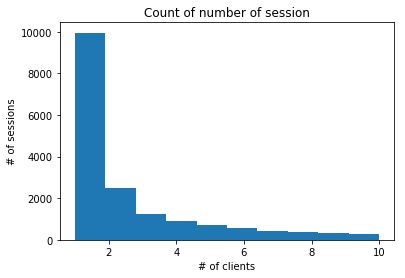

In [89]:
fig, ax = plt.subplots()
ax.hist(session_count, bins=10, range=(1,10))
plt.xlabel('# of clients')
plt.ylabel('# of sessions')
plt.title('Count of number of session');

In [ ]:
client_df.groupby('clientID').nunique()

## The average client get 5.5 sessions and sees 2.5 different therapists.
## People tend to get 1.25 hour sessions which is almost split between the 1h and 1.5h offerings we have.

In [90]:
client_df.groupby('clientID').nunique().mean()

TransactionDate     5.567647
clientID            1.000000
Therapist           2.577686
Address_Zip         0.920891
Invoice_Category    1.090646
Service_Category    1.075064
HrsWorked           1.242721
Year                1.514458
Month               2.887429
dtype: float64

# Mark Clients with Churned or Not Churned for further modeling

In [97]:
# last 2 months of unique client ids
client_df['clientID'].unique()

array([40156., 60005., 43420., ..., 83337., 83461., 28219.])

In [106]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113021 entries, 0 to 120496
Data columns (total 9 columns):
TransactionDate     113021 non-null datetime64[ns]
clientID            113021 non-null float64
Therapist           113020 non-null object
Address_Zip         110777 non-null object
Invoice_Category    113021 non-null object
Service_Category    113021 non-null object
HrsWorked           113021 non-null float64
Year                113021 non-null int64
Month               113021 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 8.6+ MB


In [146]:
start = client_df['TransactionDate'].searchsorted(dt.datetime(2019, 6, 1))
end = client_df['TransactionDate'].searchsorted(dt.datetime(2019, 8, 1))

In [147]:
not_churn_df = client_df.iloc[start:end]

In [112]:
not_churn_df['churn'] = False

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [160]:
client_ID_churn_false = pd.DataFrame(not_churn_df['clientID'].unique())

In [161]:
client_ID_churn_false['churn'] = False

In [162]:
client_ID_churn_false.columns

Index([0, 'churn'], dtype='object')

In [163]:
client_ID_churn_false.rename({0 : 'clientID'},axis=1, inplace=True)

In [165]:
client_ID_churn_false.shape

(3309, 2)

In [168]:
churn_df = client_df.merge(client_ID_churn_false, how='left', on='clientID')

In [172]:
churn_df['churn'].fillna(True, inplace=True)

In [173]:
churn_df.head()

,TransactionDate,clientID,Therapist,Address_Zip,Invoice_Category,Service_Category,HrsWorked,Year,Month,churn
0,2016-08-02,40156.0,michael jacobus,98109,Clinic_Ins,Massage,1.0,2016,8,True
1,2016-08-02,60005.0,lauren anderson,98119,Clinic_CA,Massage,1.0,2016,8,False
2,2016-08-02,43420.0,stefanie smith,98144,Clinic_Ins,Massage,1.0,2016,8,False
3,2016-08-02,56100.0,elizabeth panelo,98203,Clinic_Ins,Massage,1.0,2016,8,False
4,2016-08-02,57367.0,daniel cook,98115,Clinic_Ins,Massage,1.0,2016,8,True


In [135]:
churn_df = not_churn_df.merge(client_df, how='right', on='clientID')

In [136]:
churn_df.drop(['TransactionDate_x', 'Therapist_x', 'Address_Zip_x',
       'Invoice_Category_x', 'Service_Category_x', 'HrsWorked_x', 'Year_x',
       'Month_x'], axis=1, inplace=True)

In [137]:
churn_df.columns

Index(['clientID', 'churn', 'TransactionDate_y', 'Therapist_y',
       'Address_Zip_y', 'Invoice_Category_y', 'Service_Category_y',
       'HrsWorked_y', 'Year_y', 'Month_y'],
      dtype='object')

In [138]:
churn_df.drop(['Invoice_Category_y', 'Year_y', 'Month_y'], axis=1, inplace=True)

In [142]:
churn_df.drop_duplicates(subset=['clientID', "TransactionDate_y"], 
                     keep = False, inplace = True) 

In [145]:
churn_df

,clientID,churn,TransactionDate_y,Therapist_y,Address_Zip_y,Service_Category_y,HrsWorked_y
1360,34893.0,False,2016-10-15,rilla al-haddar,98109,Massage,1.0
1361,34893.0,False,2016-10-22,rilla al-haddar,98109,Massage,1.0
1362,34893.0,False,2016-11-01,christian curtis,98109,Massage,1.0
1363,34893.0,False,2016-11-05,rilla al-haddar,98109,Massage,1.0
1364,34893.0,False,2016-11-15,christian curtis,98109,Acupuncture,1.5
1365,34893.0,False,2016-11-19,rilla al-haddar,98109,Massage,1.0
1368,34893.0,False,2016-12-17,rilla al-haddar,98109,Massage,1.0
1369,34893.0,False,2016-12-24,rilla al-haddar,98109,Massage,1.0
1370,34893.0,False,2016-12-31,rilla al-haddar,98109,Massage,1.0
1371,34893.0,False,2017-01-07,rilla al-haddar,98109,Massage,1.0
